# The Central Limit Theorem
In this exercise we will explore and demonstrate the Central Limit Theorem—a very important idea that arises in much of science and data analysis. The theorem states that the average of a series of numbers will always follow a Gaussian, or "normal," probability distribution regardless of the probability distribution that the data points were drawn from.

A Gaussian probability distribution (or density) function (PDF) is given by 
$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right] $$
where $x_0$ is the mean of the distribution, and $\sigma$ is the standard deviation of the distribution.

Let's first take a look at a gaussian function

In [1]:
# Load in useful packages and make plots display inline
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

To make life easy, let's first make a function that creates a Gaussian curve

In [2]:
def gauss(sig=1,x0=0):
    x = np.linspace(x0-10*sig,x0+10*sig,1000)
    y = 1.0/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-x0)**2/(2*sig**2))
    return x,y

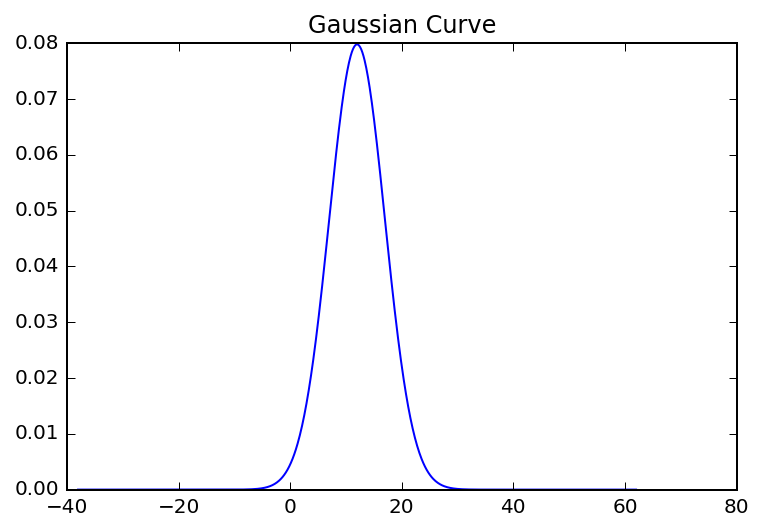

In [3]:
x,y = gauss(sig=5,x0=12)
plt.plot(x,y)
plt.title('Gaussian Curve')

Go ahead and change the mean and standard deviation and see how the curve changes...

Now, what does it mean to say that we "draw" numbers from a normal distribution? It means that numbers are drawn randomly with probability equal to the value of a Gaussian function with a given mean and standard deviation. Luckily, there is a very nice numpy function that will do this for us.

In [4]:
# This draws 100 samples from a normal distribution with a mean of "0" and a standard deviation of "1"
rand = np.random.normal(0,1,100)
print rand

[ 1.14203995 -0.94030537  0.12876833 -0.82867053 -0.85210168 -0.16744486
 -0.53693755 -1.41250193  1.91847719  0.02606771 -0.75594114 -0.15327093
  0.64810718  1.25200286  0.32196518  0.92386035 -0.76948981  0.58104723
  1.24855897 -0.54645253  0.57418101 -0.94146339  1.83183602 -0.18672369
  0.60589048  0.76670862  1.19092564  1.03824437 -1.66234472 -0.30696566
 -1.23119238  0.15803788  0.09789607 -0.00347467 -1.61647129 -0.59739161
  0.48999276 -0.57863893  2.14221171 -0.55756019 -0.98849433 -0.32506616
 -0.46295701 -0.0960485  -0.05529237 -2.68846073  0.54854477  0.10881117
  0.10381932  0.12628625 -0.13821662 -0.10659314 -2.48917515 -0.34579916
  1.45109206 -0.63095261  0.09411518  0.53324546  0.52561243  1.03089375
 -0.79545156  1.0056271  -2.59176123  0.77169923  0.8572441   0.59001709
  1.10132145 -0.46283473  1.09004173  3.40293879  0.66135728 -0.19008874
 -0.44186219  1.48358215 -0.45341665  1.45713384 -0.6837917  -0.08580709
  0.96540671  0.41136185  0.84818767 -0.27207049 -0

Hmm. Ok, it's just a bunch of values. But what are the frequency of the values?

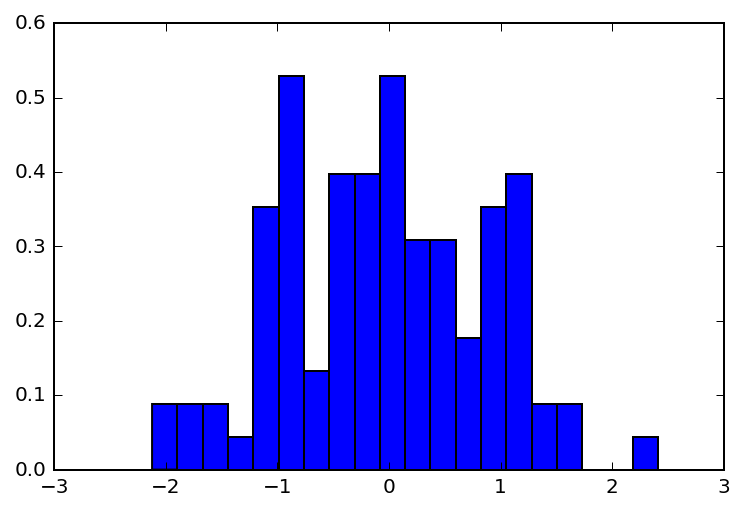

In [5]:
hist = plt.hist(np.random.normal(0,1,100),bins=20,normed=True)

Interesting! It (sort of) looks like a normal distribution. Why don't you try upping the number of samples drawn to 1000, or more! You can also increase the number of bins in your histogram. 

Next, let's overplot a Gaussian curve with the same mean and standard deviation.

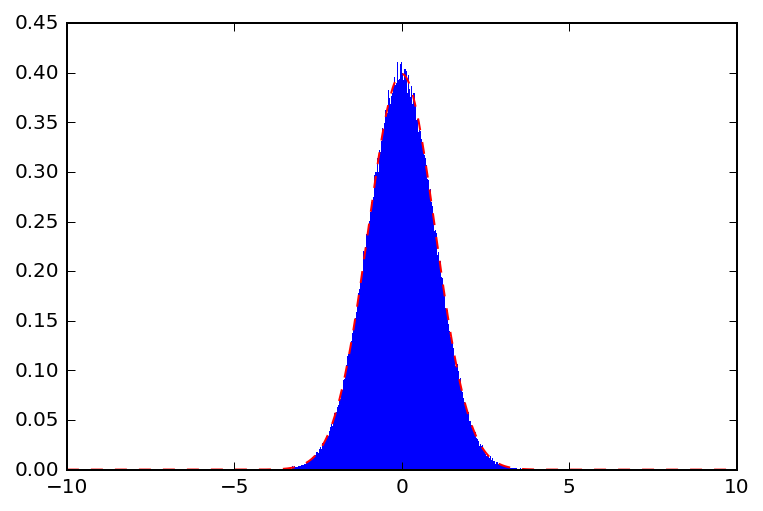

In [8]:
hist = plt.hist(np.random.normal(0,1,1000000),bins=1000,normed=True,edgecolor='none')
x,y = gauss(sig=1,x0=0)
plt.plot(x,y,'r--')

Wow! It follows the curve very well.

Ok. Now let's look at what it looks like to draw a bunch of samples from a different distribution. We'll use a lognormal form. 

1.6487212707 1.65028462337 0.998063610698


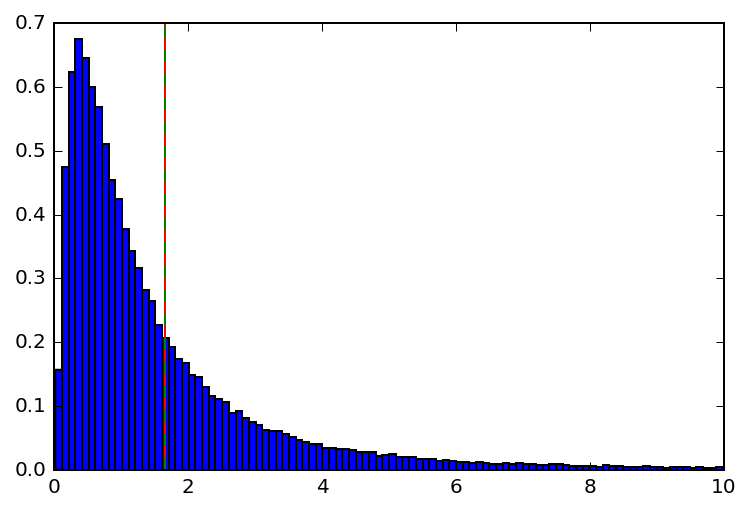

In [10]:
# This line "draws" 100000 samples
dist = np.random.lognormal(0,1,100000)
plt.hist(dist[dist<10],bins=100,normed=True)
# This is what the mean of the distribution should be
plt.axvline(x=np.sqrt(np.e),linestyle='-',color='red')
# This is the actual mean of the distribution
plt.axvline(x=np.mean(dist),linestyle='--',color='green')

print np.sqrt(np.e),np.mean(dist), np.median(dist)

Ok. So, there is a well defined mean. But this sure looks different than a normal distribution.

Now on to the Central Limit Theorem (the point of this whole exercise!). The CLT states that if we average many lognormal distributions that the result should be Gaussian! 

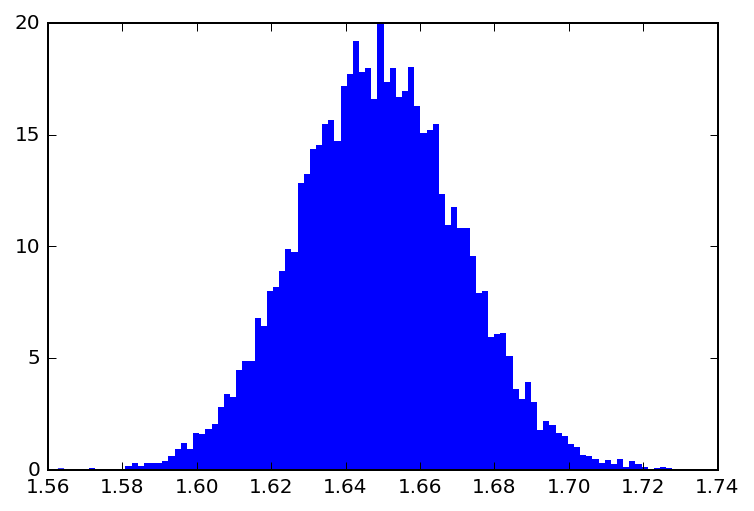

In [11]:
# The size of each distribution
size = 10000

# The number of distributions that we will create
ndist = 10000

# Create an array of zeros and then accumulate the values from each draw.
dist =  np.zeros(size)
for i in range(ndist):
    dist += np.random.lognormal(0,1,size)

# Now divide by the number of distributions to find the average values
dist /= np.float(ndist)

# Plot the resultant distribution
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')

Holy moly! It sure looks Gaussian. But is it really?

In [13]:
hist = plt.hist(dist,bins=100,normed=True,edgecolor='none')
x,y = gauss(x0=np.mean(dist),sig=np.std(dist))
plt.plot(x,y,'r--')
xlim = plt.xlim(1.56,1.74)
np.sqrt(np.e)

SyntaxError: invalid syntax (<ipython-input-13-692217b5f88d>, line 5)

## Homework
Demonstrate the CLT with a different distribution and save it in a python script or module. You may copy and edit code from this notebook. 